# Inicio

Definimos las variables necesarias para ejecutar

In [1]:
############### VARIABLES FIBONACCI #################

# primer parametro es "v1" que es el valor 1, 
v1 = 23

# segundo parametro "v2" que es el valor 2,
v2 = 67

# tercer parametro es "K" y que es requerido por la funcion para "(v1 + v2) <= K"
K_Fibonacci = 177

############### VARIABLES CONGRUENCIA FUNDAMENTAL #################

# primer parametro es "a" que multiplica a Vi, 
a = 1

# segundo parametro "c" que multiplica a Vi-k, 
c = 3

# tercer parametro es "K" que es la cantidad de espacios a crear antes de los nros aleatorios
K_Congruencias = 93

# cuarto parametro es "m" que es el tope de numeros a generar
m = 184

# Minimo y Maximo (para utilizar congruencia fundamental entre un rango de valores)

minimo = -34

maximo = 37

############### VARIABLES del ESCENARIO #################

marcas_clase = [(-34.0, -22.17), (-22.17, -10.33), (-10.33, 1.5), (1.5, 13.33), (13.33, 25.17), (25.17, 37.0)]

probabilidades = [0.02174, 0.125, 0.45109, 0.28261, 0.09239, 0.02717]

# En Fibonacci y Congruencias el parametro "n" es la cantidad de numeros que queremos generar

# Las cantidad de muestras de numeros que hay que generar:
n = 184

############### VARIABLES GENERALES #################

# Definimos la confianza para aplicar en los TEST's de Poker y Ji Cuadrada
confianza = 0.6

Importamos las librerias necesarias para ejecutar el codigo

In [2]:
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import nbformat
import math
# Importamos los metodos desarrollados para demostrar los resultados
from metodos import *

Definimos la funcion y generamos los numeros aleatorios de Fibonacci y a partir de ahi definimos y generamos los numeros pseudoaleatorios mediante la congruencia fundamental. Estos numeros pseudoaletorios son generados entre los rangos establecidos en las variables

In [3]:
# Generamos el listado de numeros aleatorios aplicando Fibonacci

numeros_fibonacci = fibonacci(v1,v2,K_Fibonacci,n)

# Imprimimos el array de fibonacci

print('Listado de numeros aleatorios aplicando Fibonacci:\n')
print(numeros_fibonacci)

# Generamos el listado de numeros aleatorios aplicando Congruencia Fundamental con valores de minimo y maximo

numeros_congruencia = congruencia_fundamental(numeros_fibonacci,a,c,K_Congruencias,m,n,marcas_clase, probabilidades)

print('\nListado de numeros aleatorios aplicando Congruencia Fundamental entre el rango de valores establecido:\n')
print(numeros_congruencia)

Listado de numeros aleatorios aplicando Fibonacci:

[23, 67, 90, 157, 70, 50, 120, 170, 113, 106, 42, 148, 13, 161, 174, 158, 155, 136, 114, 73, 10, 83, 93, 176, 92, 91, 6, 97, 103, 23, 126, 149, 98, 70, 168, 61, 52, 113, 165, 101, 89, 13, 102, 115, 40, 155, 18, 173, 14, 10, 24, 34, 58, 92, 150, 65, 38, 103, 141, 67, 31, 98, 129, 50, 2, 52, 54, 106, 160, 89, 72, 161, 56, 40, 96, 136, 55, 14, 69, 83, 152, 58, 33, 91, 124, 38, 162, 23, 8, 31, 39, 70, 109, 2, 111, 113, 47, 160, 30, 13, 43, 56, 99, 155, 77, 55, 132, 10, 142, 152, 117, 92, 32, 124, 156, 103, 82, 8, 90, 98, 11, 109, 120, 52, 172, 47, 42, 89, 131, 43, 174, 40, 37, 77, 114, 14, 128, 142, 93, 58, 151, 32, 6, 38, 44, 82, 126, 31, 157, 11, 168, 2, 170, 172, 165, 160, 148, 131, 102, 56, 158, 37, 18, 55, 73, 128, 24, 152, 176, 151, 150, 124, 97, 44, 141, 8, 149, 157, 129, 109, 61, 170, 54, 47, 101, 148]

Listado de numeros aleatorios aplicando Congruencia Fundamental entre el rango de valores establecido:

[1, 18, 2, -1, -2, 7, 1, 

Definimos y realizamos los Test's de Poker y Chi Cuadrado sobre los numeros aleatorios aplicando el rango de valores mínimos y maximos

In [4]:
      
# Se genera la impresion de los resultados en la funcion

resultado = test_poker(numeros_congruencia, minimo, maximo)

# Se genera la impresion de los resultados en la funcion

resultadoTest = res_test_poker(numeros_congruencia, resultado, confianza)

# Se genera la impresion de los resultados en la funcion

resultado = test_jicuadrado(numeros_congruencia)

# Se genera la impresion de los resultados en la funcion

resultadoTest = res_test_chi(numeros_congruencia, resultado, confianza)

83.04761904761904 < 187.21314800039414

El resultado del test de Poker para Fibonacci + Congruencia Fundamental es VERDADERO para confianza 0.6 y grados de libertad 183

158.79347826086953 < 177.5399402537021

El resultado del test de Ji Cuadrado para Fibonacci + Congruencia Fundamental es VERDADERO para confianza 0.6 y grados de libertad 183



Generamos la distribucion de Bernoulli sobre los numeros aleatorios del rango de valores establecido, contabilizamos y graficamos los datos obtenidos.

In [5]:

distribucion = distribucion_bernoulli(numeros_congruencia, minimo, maximo)

print(f'{distribucion}\n')

distribucion_bernoulli_grafico(distribucion)

[0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1
 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1]

Distribucion de los datos: {0: 117, 1: 67}



Mediante los datos obtenidos graficamos la distribución normal

la media es: -0.6195652173913043

la desviación estandar es: 11.868246263714848



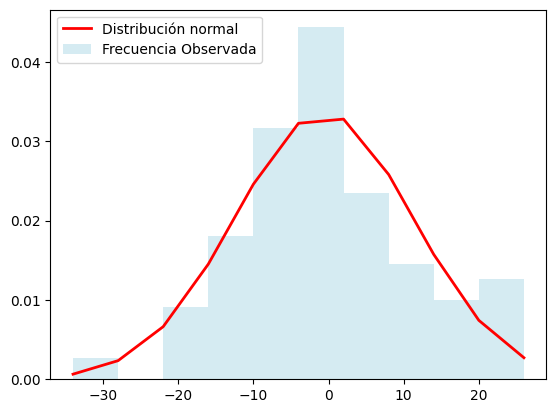

In [6]:
distribucion_normal(numeros_congruencia)

# Simulación

### Relevamiento de Humedad Relativa de la Localidad de POSADAS - MISIONES durantes los meses JULIO - DICIEMBRE del 2022

### Fuente: https://www.smn.gob.ar/descarga-de-datos

Definimos y establecemos las marcas de clases para generar las variables aleatorias sobre los datos de simulación requeridos

In [7]:
# Generamos una lista de las diferencias Humedad procesadas previamente
muestrasHumedadRelativa = []

with open("datos_extraidos_diferencia_humedad.txt") as archivo:
    for linea in archivo:
        
        # Dividimos la línea en dos valores (El primero corresponde a la fecha, el segundo a la Diferencia de Humedad respecto a la fecha anterior)
        fecha, diferencia = linea.strip().split(",")
        
        # Convertimos la diferencia a un número y añadirlo a la lista
        muestrasHumedadRelativa.append(int(diferencia))

Ejecutamos la simulación

Las variaciones de humedad relativa observadas son:
[-5, -7, 12, -12, 0, -4, -1, 6, -13, 2, 12, 7, 0, 6, -13, 23, -14, 3, 1, -2, -10, -3, 2, -7, 3, 0, 7, 9, -12, 2, -7, 3, 0, 1, 17, -11, 17, -6, -2, 4, -10, -4, -1, -4, 4, -10, 16, 12, -34, -1, 0, 6, 4, 5, 4, -10, -2, -4, 14, -11, 0, 1, -1, 29, -31, -10, 17, 7, 6, -12, 9, -22, 1, 7, -1, 4, 0, 0, -10, -5, 37, -4, -8, -7, -6, -7, 13, 1, -4, -9, 27, 8, -15, -14, -8, -2, 19, 17, -16, -12, -5, 26, 8, -17, 1, -7, 5, 4, -17, 5, 14, 17, -9, -9, -10, -19, 1, 19, -3, -10, 24, 0, 0, -21, -8, -4, -5, 9, 0, -5, 7, -4, 12, 6, 15, 10, -25, -13, 0, -6, -2, 5, 8, 35, -12, -22, -7, -11, 9, 7, 4, -5, 2, 10, 7, 1, -9, -4, -3, -5, 8, 3, 5, 0, 15, -31, -9, 10, -9, 1, 2, 14, -5, -8, 3, 3, -6, 14, 0, 17, -17, -18, -2, 4]

Las variaciones de humedad relativa con la muestra de numeros pseudoaleatorios generados artificialmente son:
[1, 18, 2, -1, -2, 7, 1, -9, 1, -6, -16, 1, 2, -7, -15, 0, 0, 11, -4, -21, -10, -2, -11, 2, -19, 24, -18, -9, -5, -5, 25, -10, -6, -

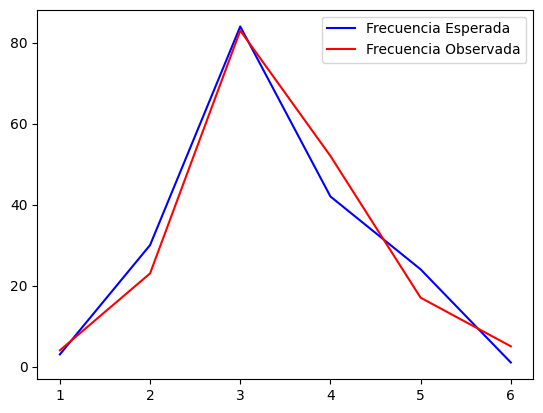

In [8]:
#Ejecutamos la simulación para contrastar las muestras de la humedad relativa respecto de los numeros pseudoaleatorios generados con los parametros establecidos

simulacion(muestrasHumedadRelativa, numeros_congruencia, marcas_clase)